In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [96]:
sales = pd.read_csv('Super_Store_data.csv', encoding='ISO-8859-1')


In [97]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [98]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [99]:
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [100]:
sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [101]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

In [102]:
sales.set_index('Order Date', inplace=True)
## In time series analysis, it's typically beneficial to use the timestamp (in this case, the 'Order Date')

In [103]:
sales.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


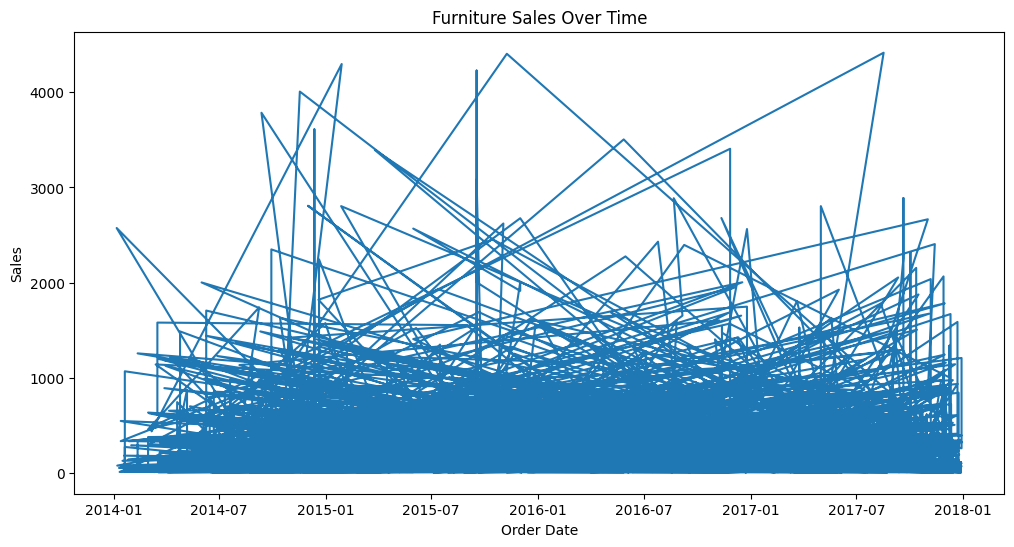

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(sales['Sales'])
plt.title('Furniture Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

to understand the components of the time series (trend, seasonality, and residual) :

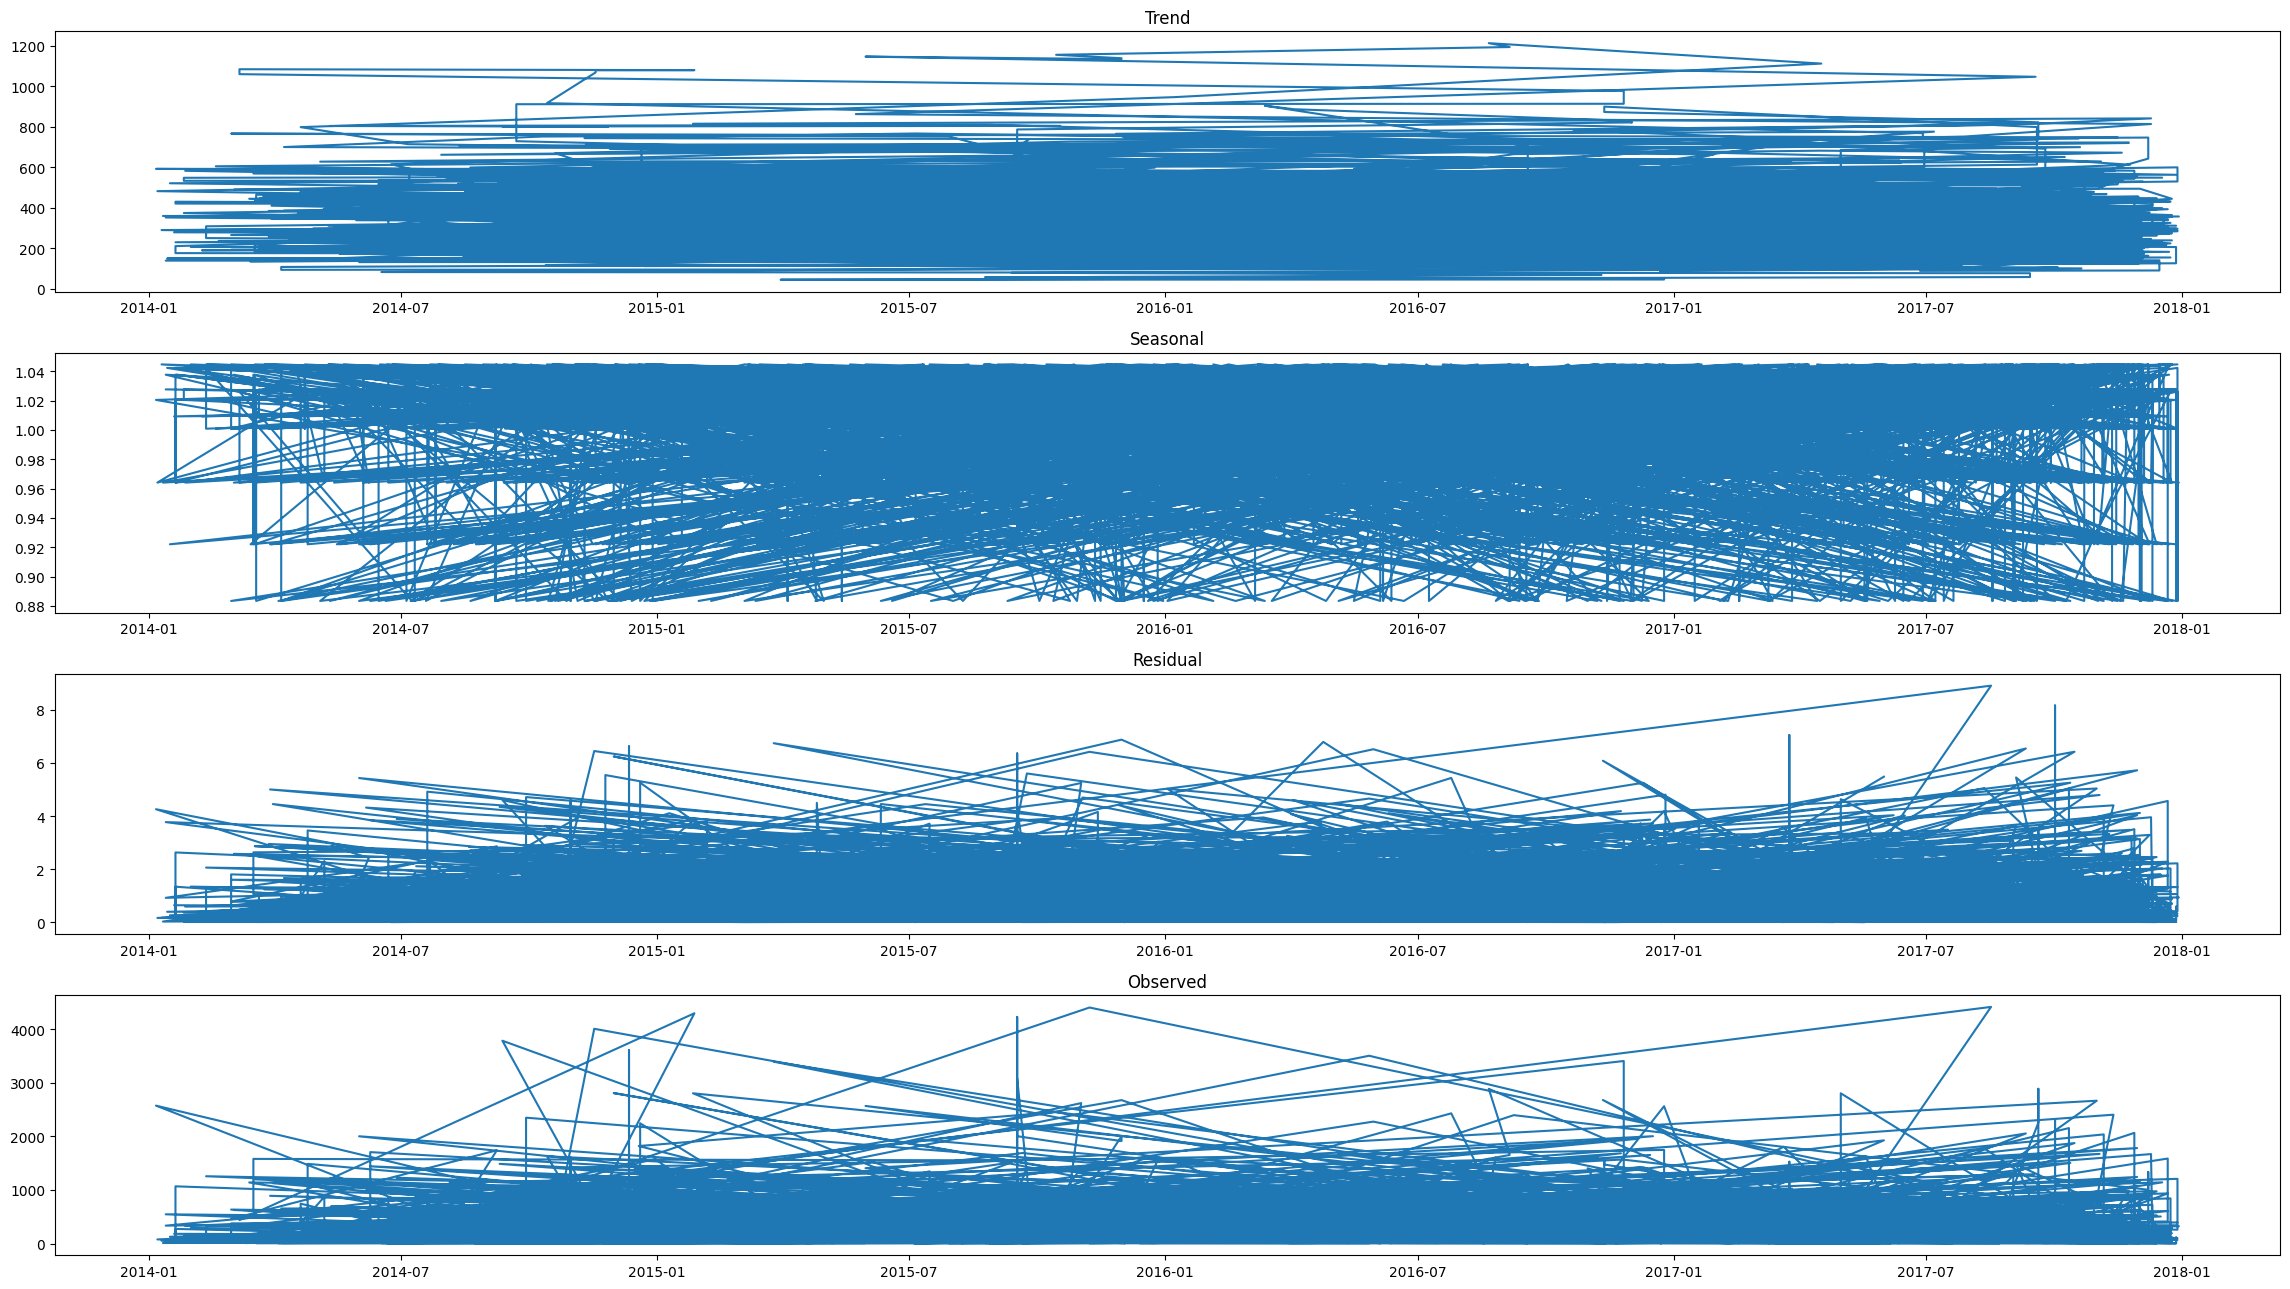

In [105]:
result = seasonal_decompose(sales['Sales'], model='multiplicative', period=12)
plt.figure(figsize=(23, 13))

plt.subplot(411)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(412)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(413)
plt.plot(result.resid)
plt.title('Residual')

plt.subplot(414)
plt.plot(result.observed)
plt.title('Observed')

plt.tight_layout()

plt.show()

# Checking the stationarity of the data  
-> the statistical properties of a process generating a time series do not change over time 


Thus, time series with trends,or with seasonality, are not stationary 

->  the trend and seasonality will affect the value of the time series at different times.


In [106]:
from statsmodels.tsa.stattools import adfuller
#p-value > 0.05: ---> not stationary -> Null Hyp
#p-value <= 0.05: --> stationary-> Alternate Hyp
result = adfuller(sales['Sales'])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[1]>0.05:
	print('not stationary')
else:
	print("stationary")


(-23.778188911852254, 0.0, 2, 2118, {'1%': -3.433441238483705, '5%': -2.862905584504915, '10%': -2.567496971789981}, 31965.622583211138)
ADF Statistic: -23.778189
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
stationary


# adfuller --> p<0.05 ---> stationary


Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is stationary and doesn't have time-dependent structure.



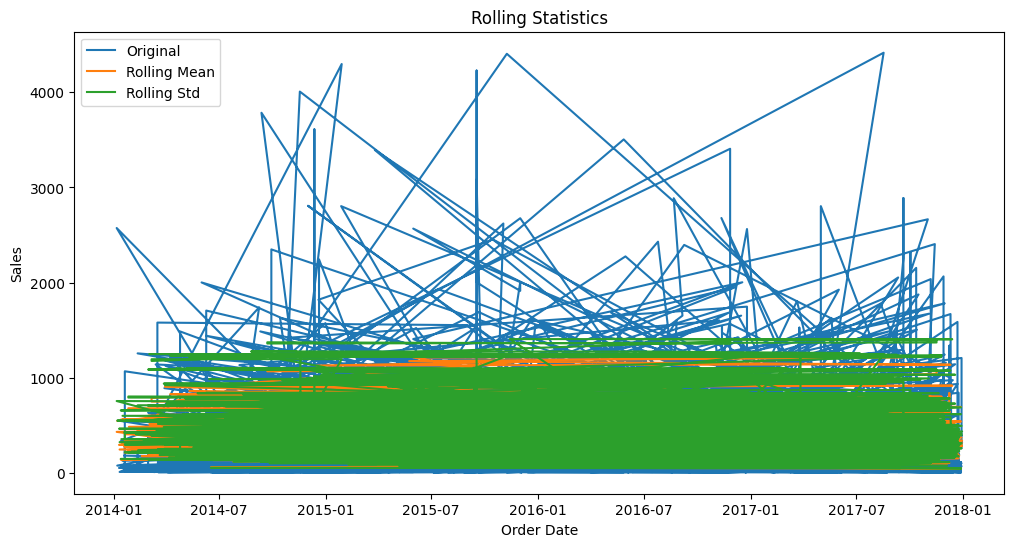

In [107]:
rolling_mean = sales['Sales'].rolling(window=12).mean()
rolling_std = sales['Sales'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(sales['Sales'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.title('Rolling Statistics')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# ACF and PACF plots are used to identify seasonality and autoregressive patterns.

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


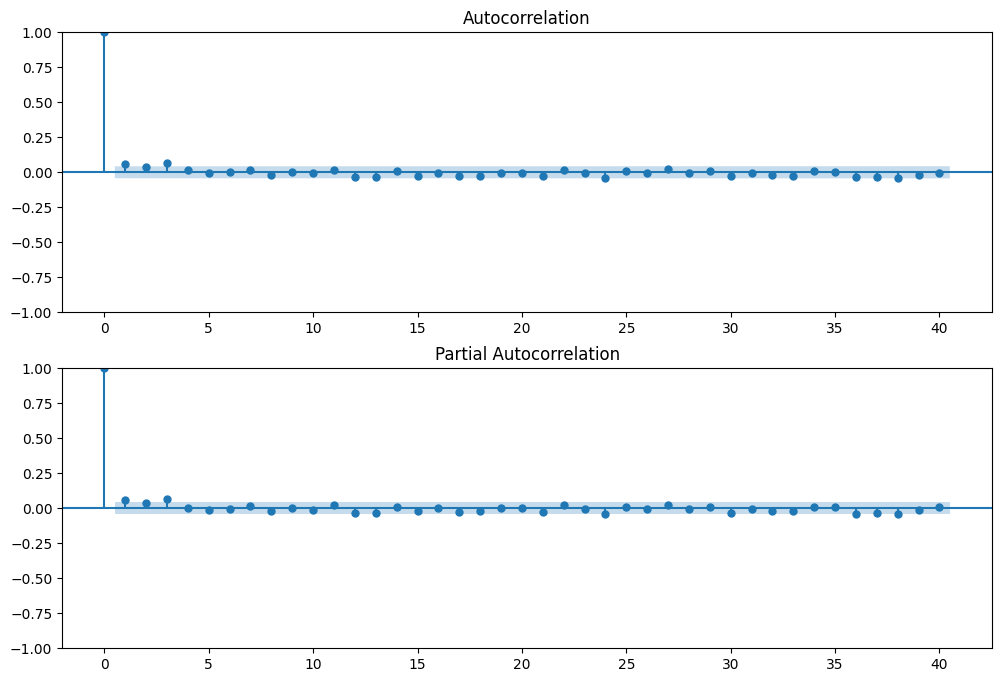

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(sales['Sales'], lags=40, ax=ax1)

plot_pacf(sales['Sales'], lags=40, ax=ax2)

plt.show()


# Autoregressive Integrated Moving Average (ARIMA)

In [109]:
from pmdarima import auto_arima

In [110]:
order = auto_arima(sales['Sales'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=32411.391, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=32406.054, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=32406.739, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33246.064, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=32405.023, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=32398.339, Time=0.16 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=32400.300, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=32400.337, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=32406.356, Time=0.16 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=32402.304, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=32696.295, Time=0.24 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 2.595 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2121
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -16194.170
Date:                Wed, 31 Jan 2024   AIC                          32398.339
Time:                        20:57:38   BIC                          32426.638
Sample:                             0   HQIC                         32408.699
                               - 2121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    296.1726     21.605     13.708      0.000     253.828     338.518
ar.L1          0.0543      0.019      2.832      0.005       0.017       0.092
ar.L2          0.0344      0.018      1.926      0.054      -0.001       0.069
ar.L3          0.0642      0.015      4.354      0.000       0.035       0.093
sigma2      2.509e+05   4171.964     60.145      0.000    2.43e+05    2.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             26118.37
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             3.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
from statsmodels.tsa.arima.model import ARIMA

In [112]:
model = ARIMA(sales['Sales'], order=(3,0,0))
results = model.fit()
results.summary()

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monoto

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 2121
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -16194.169
Date:                Wed, 31 Jan 2024   AIC                          32398.339
Time:                        20:57:38   BIC                          32426.637
Sample:                             0   HQIC                         32408.698
                               - 2121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.8349     20.940     16.706      0.000     308.793     390.877
ar.L1          0.0541      0.019      2.823      0.005       0.017       0.092
ar.L2          0.0342      0.018      1.913      0.056      -0.001       0.069
ar.L3          0.0639      0.015      4.339      0.000       0.035       0.093
sigma2      2.509e+05   4172.159     60.142      0.000    2.43e+05    2.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             26122.00
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             3.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:

# Forecast next year
forecast = results.forecast(steps=12)

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Order Date'>

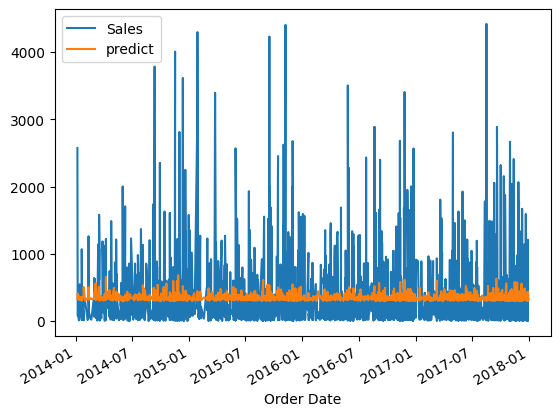

In [125]:
sales['predict'] = results.predict()
sales[['Sales','predict']].plot()

<Axes: >

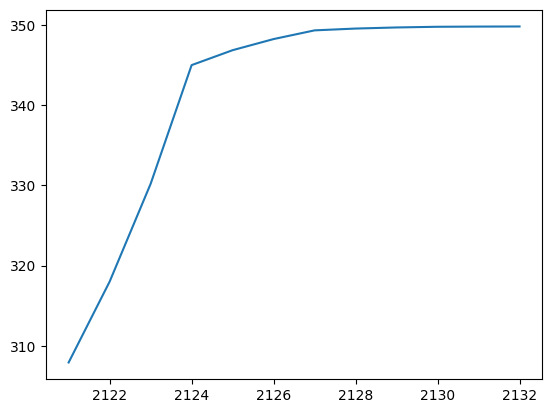

In [115]:
forecast.plot()

<Axes: xlabel='Order Date'>

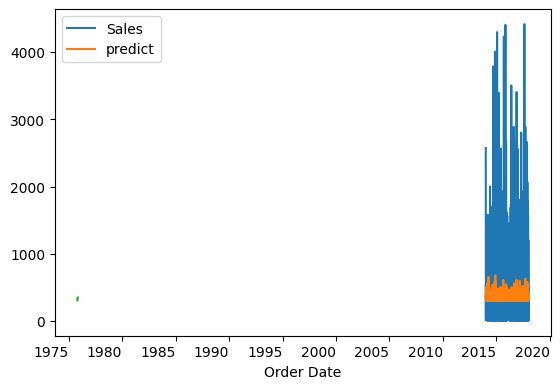

In [131]:
sales[['Sales','predict']].plot()
forecast.plot()

In [127]:
type(forecast)

pandas.core.series.Series

# Exponential Smoothing State Space Models (ETS):

In [132]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [133]:
model = ExponentialSmoothing(sales['Sales'], seasonal='add', seasonal_periods=12)
results = model.fit()
results.summary()

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Sales,No. Observations:,2121
Model:,ExponentialSmoothing,SSE,563986864.911
Optimized:,True,AIC,26521.196
Trend:,None,BIC,26600.431
Seasonal:,Additive,AICC,26521.454
Seasonal Periods:,12,Date:,"Wed, 31 Jan 2024"
Box-Cox:,False,Time:,21:26:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0285714,alpha,True
smoothing_seasonal,0.0231293,gamma,True


In [135]:
forecast = results.forecast(steps=12)

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Order Date'>

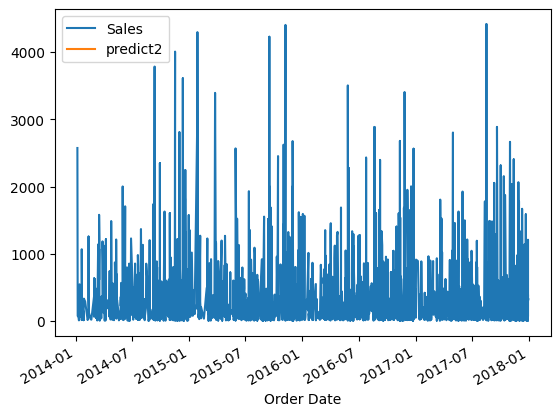

In [136]:
sales['predict2'] = results.predict()
sales[['Sales','predict2']].plot()

<Axes: >

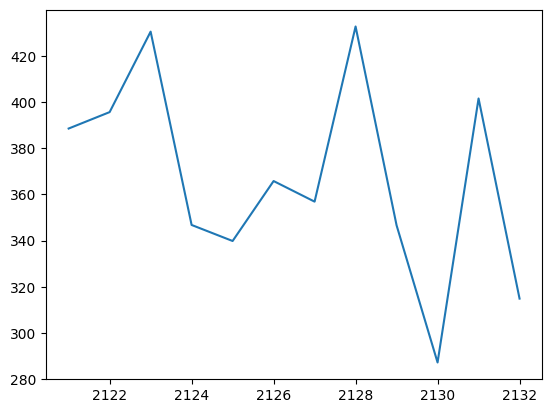

In [137]:
forecast.plot()

<Axes: xlabel='Order Date'>

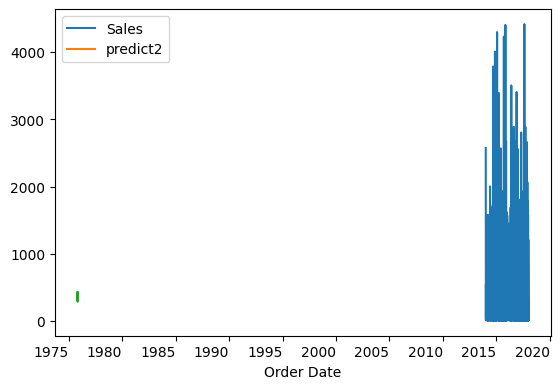

In [140]:
sales[['Sales','predict2']].plot()
forecast.plot()

In [159]:
type(forecast)

pandas.core.series.Series